# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os


# Improting Keras Libraries

In [ ]:
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 10.1016@j.est.2020.101729.pdf
 1-s2.0-S0172219020300946-main.pdf
 1-s2.0-S0278612522000450-main.pdf
 1-s2.0-S0378775321005292-main.pdf
 1-s2.0-S1290072923000777-main.pdf
 1-s2.0-S135943111835614X-main.pdf
 1-s2.0-S1359431121009388-main.pdf
 1-s2.0-S136403211930454X-main.pdf
 1-s2.0-S2352550921001020-main.pdf
 1-s2.0-S2666386422002934-main.pdf
'1-s2 (1).0-S0172219020300946-main.pdf'
'1-s2 (1).0-S1290072923000777-main.pdf'
'1-s2 (1).0-S135943111835614X-main.pdf'
'An empirical case study on Indian consumers towards EV (1).pdf'
'An empirical case study on Indian consumers towards EV.pdf'
 asi-05-00012-v2.pdf
 Battery_RUL.csv
'Big_Data_Analysis_Technology_for_Electric_Vehicle_Networks_in_Smart_Cities (1).pdf'
 Big_Data_Analysis_Technology_for_Electric_Vehicle_Networks_in_Smart_Cities.pdf
 Big_Data_Analytics_for_Electric_Vehicle_Integration_in_Green_Smart_Cities.pdf
'Bird Speciees Dataset'
 bird_species.h5
 Charging_Demand_Forecasting_Model_for_Electric_Vehicles_Based_on_Online_Ride-Hailing

# Viewing of Images

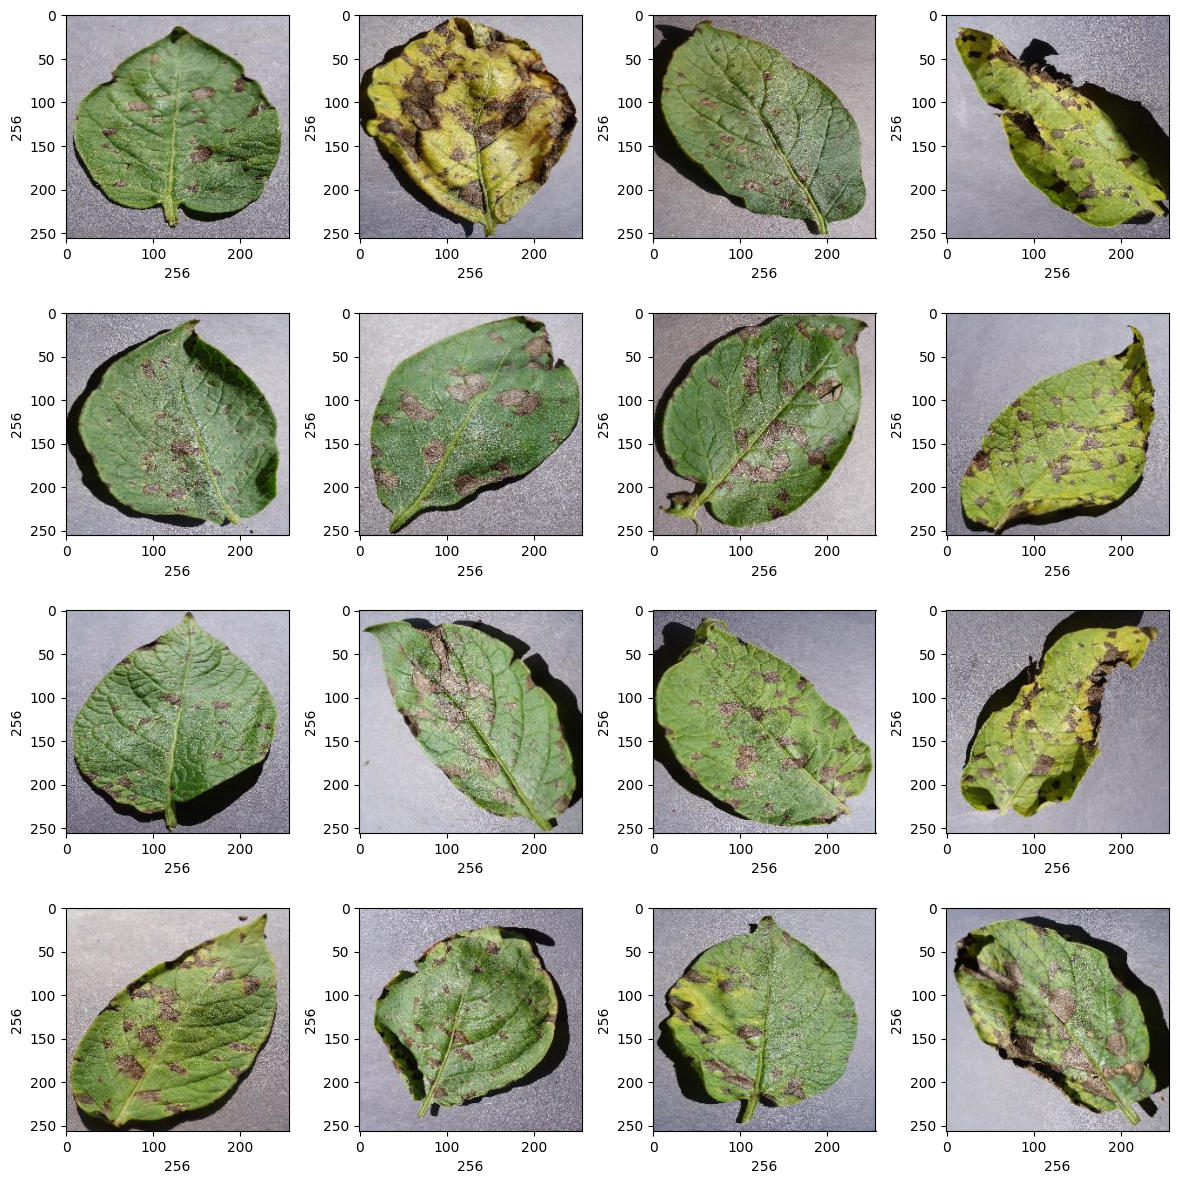

In [ ]:
plt.figure(figsize=(16,16))
path = "/content/drive/My Drive/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height

# Convert it to Numpy Array

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "/content/drive/My Drive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

# Normalize the data

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

# Convert y_train and y_test to categorical data

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# make a CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

# Split some into Train and Val from Train data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

# Train the Model

In [ ]:
# Training the model
epochs = 5
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/5
5/5 [==============================] - 53s 6s/step - loss: 1.0598 - accuracy: 0.3455 - val_loss: 0.9683 - val_accuracy: 0.8333
Epoch 2/5
5/5 [==============================] - 38s 7s/step - loss: 0.9283 - accuracy: 0.8698 - val_loss: 0.8355 - val_accuracy: 0.8889
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.7948 - accuracy: 0.9062 - val_loss: 0.7126 - val_accuracy: 0.9097
Epoch 4/5
5/5 [==============================] - 32s 6s/step - loss: 0.6737 - accuracy: 0.9306 - val_loss: 0.6087 - val_accuracy: 0.9028
Epoch 5/5
5/5 [==============================] - 41s 8s/step - loss: 0.5550 - accuracy: 0.9635 - val_loss: 0.5066 - val_accuracy: 0.9236


# Calculate Accuracy

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 4s 544ms/step - loss: 0.5106 - accuracy: 0.9222
Test Accuracy: 92.22221970558167


# Prediction

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 4s 650ms/step


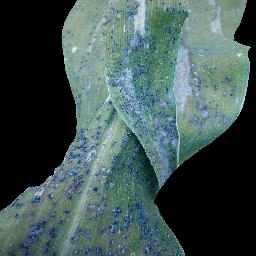

In [ ]:
img = array_to_img(x_test[1])
img

In [ ]:
print("Originally : ",all_labels[np.argmax(y_test[1])])
print("Predicted : ",all_labels[np.argmax(y_pred[1])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
